In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [307]:
import warnings
warnings.filterwarnings('ignore')

In [308]:
#Nuskaitykite DUS2014csv ir DUS2018.csv į pandas lenteles
# .query(), .value_counts():
# Kiek dalyvavo vyrų, moterų apklausoje kiekvienais metais. Suraskite pokytį,
# rezultatus išspausdinkite
dus14 = pd.read_csv('DUS2014.csv')
dus18 = pd.read_csv('DUS2018.csv')
dus14small = dus14[['lytis','amzius','issilavinimas','bdu_spalio']]
dus18small = dus18[['lytis','amzius','issilavinimas','bdu_spalio']]

mot14 = dus14small[dus14small['lytis'] == 'F']
motsk14 = mot14['lytis'].value_counts().values[0]
vyr14 = dus14small[dus14small['lytis'] == 'M']
vyrsk14 = vyr14['lytis'].value_counts().values[0]

mot18 = dus18small[dus18small['lytis'] == 'F']
motsk18 = mot18['lytis'].value_counts().values[0]
vyr18 = dus18small[dus18small['lytis'] == 'M']
vyrsk18 = vyr18['lytis'].value_counts().values[0]

motsk_pokytis = motsk14 - motsk18
vyrsk_pokytis = vyrsk14 - vyrsk18

print ('2014 ir 2018 metais apklaustu moteru skaiciaus pokytis:', motsk_pokytis)
print ('2014 ir 2018 metais apklaustu vyru skaiciaus pokytis:', vyrsk_pokytis)

2014 ir 2018 metais apklaustu moteru skaiciaus pokytis: 1678
2014 ir 2018 metais apklaustu vyru skaiciaus pokytis: 110


In [309]:
dus18small.head(15)

,lytis,amzius,issilavinimas,bdu_spalio
0,F,40-49,G2,460
1,M,50-59,G2,1487
2,M,40-49,G2,1500
3,M,50-59,G2,1500
4,F,40-49,G2,400
5,F,40-49,G2,400
6,F,14-29,G2,400
7,M,50-59,G2,400
8,F,50-59,G2,400
9,F,30-39,G2,400


In [310]:
# kiek 2018 metais buvo respondentų iš kiekvienos amžiaus grupės?

amziausgrupes = dus18small['amzius'].value_counts()
print(amziausgrupes)

amzius
50-59    10056
40-49     9421
14-29     9368
30-39     9282
60+       5037
Name: count, dtype: int64


In [311]:
# Suraskite vidutinius atlyginimus kiekvienai amžiaus grupei (2018 metams)
# hint:as for ciklas moka eiti per array vertes, kurias gausite su .index arba .values atributais

amziausgrupes = dus18small['amzius'].value_counts().index

print('Vidutinis atlyginimas pagal amziaus grupes:')
for amzius in amziausgrupes:
    atr = dus18small.query('amzius == @amzius')
    vid = atr['bdu_spalio'].mean()
    print(amzius, vid)


Vidutinis atlyginimas pagal amziaus grupes:
50-59 856.0671241050119
40-49 980.8554293599406
14-29 865.5633005977796
30-39 1088.9557207498383
60+ 784.542386341076


In [312]:
# Palyginkite, kiek procentais daugiau uždirbo vyrai už moteris 2018 metais?
# Kiek procentais vyrai uždirba daugiau, nei bendras atlyginimų vidurkis?
# Kiek procentais moterys uždirba mažiau, nei bendras atlyginimų vidurkis?
# imkite bdu_spalio

f18 = dus18small[dus18small['lytis'] == 'F']
m18 = dus18small[dus18small['lytis'] == 'M']
f18vid = f18['bdu_spalio'].mean()
m18vid = m18['bdu_spalio'].mean()

# skirtumas1 = m18vid-f18vid
# sk_vyrmot = (f18vid+m18vid)/2
skirtumas_proc = (f18vid*100/m18vid-100)*-1
print('Vyrai uzdirba daugiau uz moteris ant', skirtumas_proc, '%')

bendr_vid = dus18small['bdu_spalio'].mean()

vyrai_daugiau_bendr = m18vid*100/bendr_vid-100
print('Vyrai uzdirba daugiau nei bendras atlyginimas ant', vyrai_daugiau_bendr, '%')

mot_maziau_bendr = (f18vid*100/bendr_vid-100)*-1
print('Moterys uzdirba maziau nei bendras atlyginimas ant', mot_maziau_bendr, '%')

Vyrai uzdirba daugiau uz moteris ant 17.974370561948064 %
Vyrai uzdirba daugiau nei bendras atlyginimas ant 9.427035640478195 %
Moterys uzdirba maziau nei bendras atlyginimas ant 10.241785240496341 %


In [313]:
# print("Kiek procentais daugiau uždirbo vyrai už moteris 2018 metais %", (Men2018ave/Women2018ave - 1)*100)
# print("Kiek procentais vyrai uždirba daugiau, nei bendras atlyginimų vidurkis %", (Men2018ave/BduMenAndWomen - 1)*100)
# print("Kiek procentais moterys uždirba mažiau, nei bendras atlyginimų vidurkis %", (Women2018ave/BduMenAndWomen - 1)*100)

In [314]:
# Nuskaitykite aruodas.csv failą
# Pridėkite prie DataFrame'o naują stulpelį "KainaS", kur būtų skaičiai (float'ai) iš stulpelio "€/S"
# tam panaudokite savo sukurtą funkciją, kuri tekstą verstų į float'us
# bei .apply() metodą
# Suraskite vidutinę kv. m. kainą.

ard = pd.read_csv('aruodas.csv')

ard['KainaS'] = ard['€/S']

kainos = []
def kainos(x):
    kainos = float(x[:-4])
    return kainos

ard['KainaS'] = ard['€/S'].apply(kainos)

vid = ard['KainaS'].mean()
print(vid)

3301.46678555506


In [315]:
ard.head()

,Unnamed: 0,Linkas,Adresas,Kaina,€/S,Aukštas,Plotas,Kambariai,KainaS
0,0,https://www.aruodas.lt/butai-vilniuje-lazdynel...,"Lazdynėliai, Žaibo g.",155 000 €,3690€/m²,4/4,42.00,2,3690.0
1,1,https://www.aruodas.lt/butai-vilniuje-pasilaic...,"Pašilaičiai, Pavilnionių g.",125 880 €,2977€/m²,4/4,42.28,2,2977.0
2,2,https://www.aruodas.lt/butai-vilniuje-lazdynel...,"Lazdynėliai, Žaibo g.",166 000 €,3773€/m²,2/4,44.00,2,3773.0
3,3,https://www.aruodas.lt/butai-vilniuje-pasilaic...,"Pašilaičiai, Perkūnkiemio g.",109 900 €,3283€/m²,7/12,33.48,1,3283.0
4,4,https://www.aruodas.lt/butai-vilniuje-pilaitej...,"Pilaitė, Pilkalnio g.",137 000 €,3703€/m²,4/4,37.00,2,3703.0


In [316]:
nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates=['OCCUR_DATE', 'OCCUR_TIME'])
nypd.head(2)

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude
0,201575314,2019-08-23,2024-04-12 22:10:00,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,40.697805,-73.808141
1,205748546,2019-11-27,2024-04-12 15:54:00,BRONX,40,0.0,NaN,False,<18,M,BLACK,25-44,F,BLACK,40.818700,-73.918571


In [317]:
nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates={'DATA':['OCCUR_DATE', 'OCCUR_TIME']})
nypd.head(3)

,DATA,INCIDENT_KEY,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude
0,2019-08-23 22:10:00,201575314,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,40.697805,-73.808141
1,2019-11-27 15:54:00,205748546,BRONX,40,0.0,NaN,False,<18,M,BLACK,25-44,F,BLACK,40.818700,-73.918571
2,2019-02-02 19:40:00,193118596,MANHATTAN,23,0.0,NaN,False,18-24,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,40.791916,-73.945480


In [318]:
nypd_small = nypd[['DATA', 'BORO', 'STATISTICAL_MURDER_FLAG']]
nypd_small.head(2)

,DATA,BORO,STATISTICAL_MURDER_FLAG
0,2019-08-23 22:10:00,QUEENS,False
1,2019-11-27 15:54:00,BRONX,False


In [319]:
nypd_small['MonthNr'] = nypd_small['DATA'].dt.month
nypd_small['Hour'] = nypd_small['DATA'].dt.hour
nypd_small['HR'] = nypd_small['DATA'].dt.round('H').dt.hour
nypd_small['MthName'] = nypd_small['DATA'].dt.month_name()
nypd_small.head()

,DATA,BORO,STATISTICAL_MURDER_FLAG,MonthNr,Hour,HR,MthName
0,2019-08-23 22:10:00,QUEENS,False,8,22,22,August
1,2019-11-27 15:54:00,BRONX,False,11,15,16,November
2,2019-02-02 19:40:00,MANHATTAN,False,2,19,20,February
3,2019-10-24 00:52:00,STATEN ISLAND,True,10,0,1,October
4,2019-08-22 18:03:00,BRONX,False,8,18,18,August


In [320]:
nypd_small['Paros laikas'] = nypd_small['DATA']

paroslaikas = []
def paroslaikas(x):
    if x >= 22 or x < 6:
        return 'Naktis'
    elif x >= 6 and x < 10:
        return 'Rytas'
    elif x >= 10 and x < 16:
        return 'Diena'
    else:
        return 'Vakaras'

nypd_small['ParosL'] = nypd_small['Hour'].apply(paroslaikas)

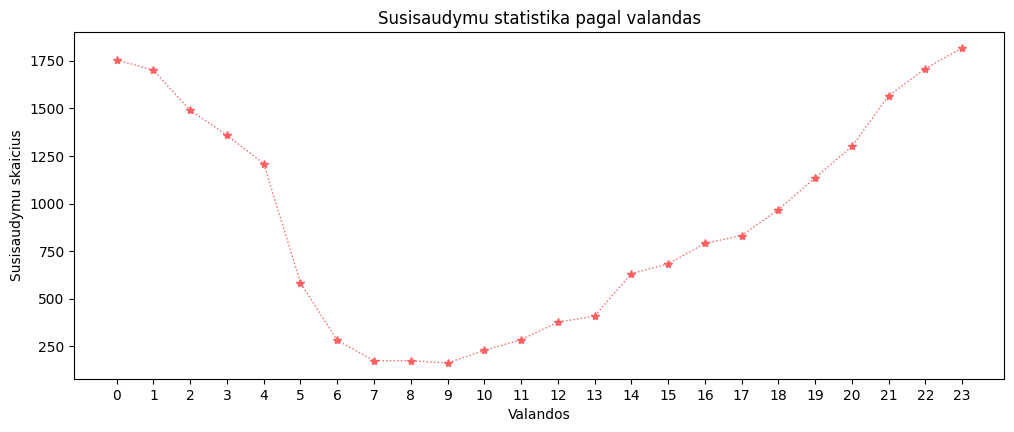

In [321]:
#NYPD failas:
#Su vizualizacija:
# Kurios valandos, kurie paros metai buvo pavojingiausi susišaudymų prasme?

laikas = nypd_small['Hour'].value_counts().sort_index(ascending=True).index
sk = nypd_small['Hour'].value_counts().sort_index(ascending=True).values

a = laikas
b = sk
fig, ax = plt.subplots(figsize =[12,4.5])
ax.plot(a,b, linestyle=':', color='#ff6163', linewidth=1, marker='*')
ax.set_xlabel('Valandos')
ax.set_ylabel('Susisaudymu skaicius')
ax.set_title('Susisaudymu statistika pagal valandas')
ax.set_xticks(laikas)

plt.show()

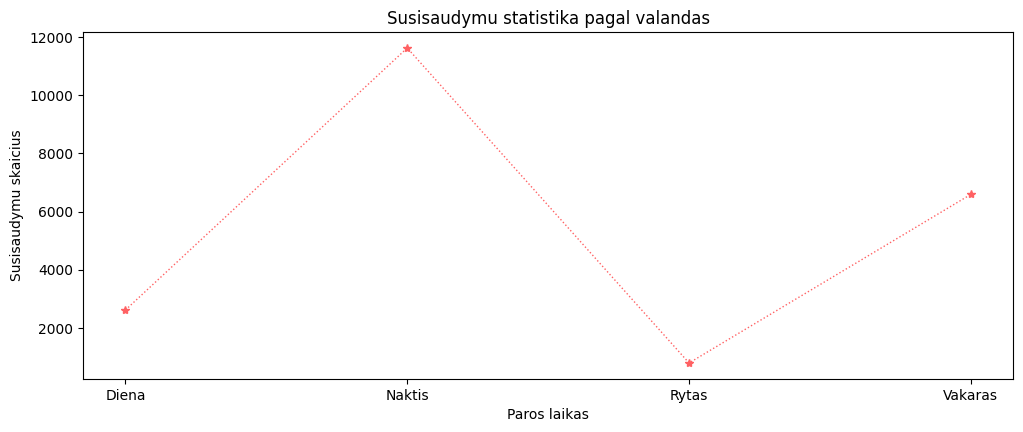

In [322]:
#NYPD failas:
#Su vizualizacija:
# Kurios valandos, kurie paros metai buvo pavojingiausi susišaudymų prasme?

laikas = nypd_small['ParosL'].value_counts().sort_index(ascending=True).index
sk = nypd_small['ParosL'].value_counts().sort_index(ascending=True).values

a = laikas
b = sk
fig, ax = plt.subplots(figsize =[12,4.5])
ax.plot(a,b, linestyle=':', color='#ff6163', linewidth=1, marker='*')
ax.set_xlabel('Paros laikas')
ax.set_ylabel('Susisaudymu skaicius')
ax.set_title('Susisaudymu statistika pagal valandas')

plt.show()

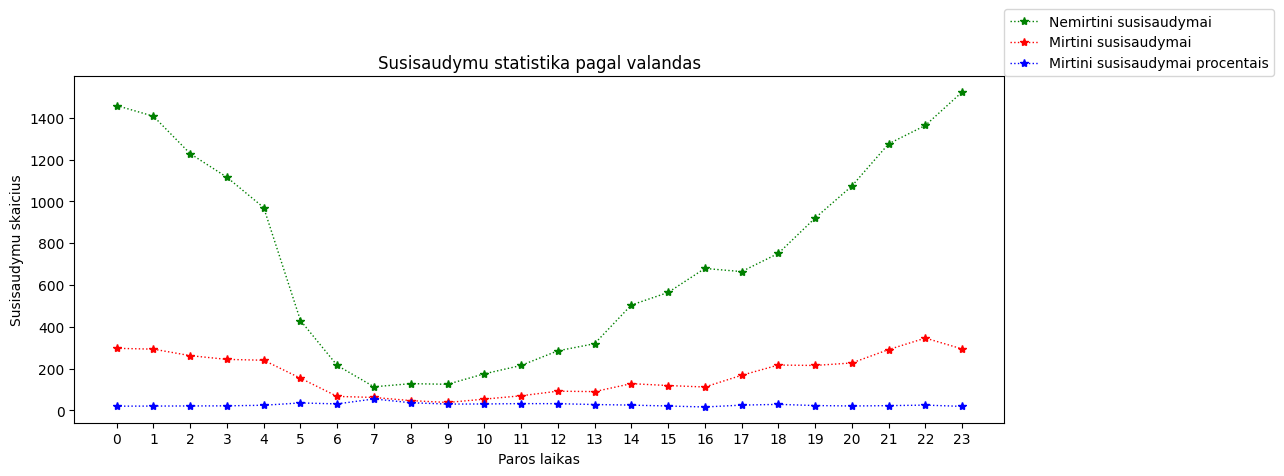

In [417]:
#A) Kuriose valandose mirtinų susišaudymų kiekis buvo didžiausias?
#B) Kuriose valandose procentinis mirtinų susišaudymų kiekis yra didžiausias?
#Ar A ir B valandos sutampa, arne?

susisaudymai = nypd_small[nypd_small['STATISTICAL_MURDER_FLAG'] == False]['Hour'].value_counts().sort_index(ascending=True).values
mirt_susisaudymai = nypd_small[nypd_small['STATISTICAL_MURDER_FLAG'] == True]['Hour'].value_counts().sort_index(ascending=True).values
valandos = nypd_small['Hour'].value_counts().sort_index(ascending=True).index
didz_v = nypd_small[nypd_small['STATISTICAL_MURDER_FLAG'] == True]['Hour'].value_counts().idxmax()
proc_h = (mirt_susisaudymai/susisaudymai)*100

a = valandos
b = susisaudymai
c = mirt_susisaudymai
d = proc_h
fig, ax = plt.subplots(figsize =[12,4.5])
ax.plot(a,b, label = 'Nemirtini susisaudymai', linestyle=':', color='green', linewidth=1, marker='*')
ax.plot(a,c, label = 'Mirtini susisaudymai', linestyle=':', color='red', linewidth=1, marker='*')
ax.plot(a,d, label = 'Mirtini susisaudymai procentais', linestyle=':', color='blue', linewidth=1, marker='*')
ax.set_xlabel('Paros laikas')
ax.set_ylabel('Susisaudymu skaicius')
ax.set_title('Susisaudymu statistika pagal valandas')
ax.set_xticks(a)
ax.legend(loc=[1,1])
plt.show()


In [356]:
#Su life-exp.csv:
#atrinkite su .query() į naują lentelę tik 2019 metų duomenis.
# Toliau naudojama tik naujoji lentelė
life = pd.read_csv('life-exp.csv')
life2019 = life[life['Year'] == 2019]
life2019.head(3)

,Entity,Code,Year,Life expectancy
15552,Afghanistan,AFG,2019,64.833
15553,Africa,NaN,2019,63.170
15554,Albania,ALB,2019,78.573


In [357]:
# Suraskite vidutinę gyvenimo trukmę
vid_gt = life2019['Life expectancy'].mean()
print(vid_gt)

73.83298925497944


In [355]:
# Suskirstykite valstybes į ilgaamžes ir ne
# jei gyvenimo trukmė mažiau nei vidurkis - neilgaamžė
# jei didesnė - ilgaamžė.
# Kiek buvo valstybių ilgaamžių, neilgaamžių?

def ilgaamziskumas(life_ex):
    if life_ex < vid_gt:
        return 'Neilgaamze'
    else:
        return 'Ilgaamze'

life2019['Ilgaamziskumas'] = life2019['Life expectancy'].apply(ilgaamziskumas)
life2019['Ilgaamziskumas'].value_counts()

Ilgaamziskumas
Ilgaamze      138
Neilgaamze    105
Name: count, dtype: int64

In [408]:
#Su Dar su life-exp.csv:
#Nuskaitykite failą
#Suraskite vidutinę, minimalią, maksimalią gyvenimo trukmę Lietuvai, 
# Latvijai, Švedijai, Vokietijai

lt = life[life['Entity'] == 'Lithuania']
vid = lt['Life expectancy'].mean()
min = lt['Life expectancy'].min()
max = lt['Life expectancy'].max()
print('Lietuvos gyventoju vidutine, minimali ir maksimali gyvenimo trukme:', vid, min, max, sep = '\n')


Lietuvos gyventoju vidutine, minimali ir maksimali gyvenimo trukme:
71.0685076923077
64.336
75.933


In [391]:
lv = life[life['Entity'] == 'Latvia']
vid = lv['Life expectancy'].mean()
min = lv['Life expectancy'].min()
max = lv['Life expectancy'].max()
print('Latvijos gyventoju vidutine, minimali ir maksimali gyvenimo trukme:', vid, min, max, sep = '\n')

Latvijos gyventoju vidutine, minimali ir maksimali gyvenimo trukme:
70.25466153846155
65.414
75.292


In [392]:
sw = life[life['Entity'] == 'Sweden']
vid = sw['Life expectancy'].mean()
min = sw['Life expectancy'].min()
max = sw['Life expectancy'].max()
print('Svedijos gyventoju vidutine, minimali ir maksimali gyvenimo trukme:', vid, min, max, sep = '\n')

Svedijos gyventoju vidutine, minimali ir maksimali gyvenimo trukme:
77.40807692307692
72.446
82.797


In [393]:
gr = life[life['Entity'] == 'Germany']
vid = gr['Life expectancy'].mean()
min = gr['Life expectancy'].min()
max = gr['Life expectancy'].max()
print('Vokietijos gyventoju vidutine, minimali ir maksimali gyvenimo trukme:', vid, min, max, sep = '\n')

Vokietijos gyventoju vidutine, minimali ir maksimali gyvenimo trukme:
74.88489230769231
68.265
81.326


In [395]:
# Padarykite, jog vartotojas galėtų įvesti, kokios šalies
# duomenis reikia išvesti
#Bonus - .plot() vizualizacija tokių duomenų:
# gyvenimo trukmė kiekvienais metais Lietuvai ir vartotojo įvestai šaliai

x = input('Iveskite valstybes pavadinima angliskai')
print(x)
ats = life[life['Entity'] == x]
vid = ats['Life expectancy'].mean()
min = ats['Life expectancy'].min()
max = ats['Life expectancy'].max()
print('Jusu irasytos valstybes gyventoju vidutine, minimali ir maksimali gyvenimo trukme:', vid, min, max, sep = '\n')

Poland
Jusu irasytos valstybes gyventoju vidutine, minimali ir maksimali gyvenimo trukme:
71.85746153846152
63.996
78.73


In [431]:
#AUTO.CSV failas:
#Raskite vidutinę kainą, ridą visiems automobiliams bei atskirai šiems: BMW, Audi, Toyota, Vokswagen, Ford.
#Suskirstykite automobilius pagal santykį su vidutine kaina:
# < 0.75 avg - pigūs
# 0.75 iki 1.15 avg - vidutiniai, 
# > 1.15 avg - brangūs
# Kiek kiekvienoje grupėje buvo tokių auto?
#tai vizualizuokite su bar 

auto = pd.read_csv('auto.csv', sep ='|')
auto.head(1)

,index,id,gamintojas,modelis,pagaminimo_data,rida,variklis,kuro_tipas,varantieji_ratai,pavaros,...,service_book,warranty,catalytic_converter,multiple_key_sets,double_wheels,folding_seats,insulated_glass,two_sliding_doors,personal_ventilation,personal_illumination
0,0,ID:22996628,BMW,M5,2005-12,253 000 km,"4999 cm³, 507 AG (373kW)",Benzinas,Galiniai,Automatinė,...,0,0,0,0,0,0,0,0,0,0


In [446]:
autosmall = auto[['price', 'gamintojas']]
autosmall.head(5)

,price,gamintojas
0,19 500,BMW
1,2 700,Mitsubishi
2,13 490,Seat
3,14 650,Skoda
4,38 000,Volvo


In [450]:
autosmall['KainaS'] = autosmall['price']

kainos = []
def kainos(x):
    kainos = float(x).replace(' ', '')
    return kainos

autosmall['KainaS'] = autosmall['price'].apply(kainos)


ValueError: could not convert string to float: '19 500'

In [ ]:
# 2024-04-15

In [34]:
# duoti sąrašai:
x = [12,16,17,1,0,-1,-8,10,14]
y = ["Vilnius", 1323, 'Kaunas', 'Alytus', 'omega', -42, 42]
z = ["Vilnius", 1323,[4,5,6], 'Kaunas', 'Alytus', 'omega', -42, 42, [1,2,3]]
# su map () ir savo pasirašyta funkcija sugeneruokite naujus sąrašus, kur 
# būtų simbolių kiekiai iš sąrašų x ir y.
# advanced: skaidrėse susiraskite prie if'o is operatorių ir pavyzdžius su type()
# ir sugeneruokite naują sąrašą iš z'o:
#  kur tekstas - tai suskaičiuojate simbolių kiekį, kur skaičius - padauginate iš 2.5
#  kur sąrašas - randate sąrašo skaičiųą sumą

# hint: str(), len() funkcijos

def simb(e):
    return len(str(e)) 

x1 = list(map(simb, x))
print(x1)
y1  = list(map(simb, y))
print(y1)

a =  []
for e in z:
    if type(e) is str:
        a.append(len(e))
    elif type(e) is list:
        a.append(sum(e))
    else:
        a.append(e*2.5)
    
print(a)

b = [len(e) if type(e) is str else sum(e) if type(e) is list else e*2.5 for e in z]
print(b)

def veiksmai (el):
    if type(el) is str:
        return len(el)
    elif type(el) is int:
        return el*2.5
    elif type(el) is list:
        return sum(el)
    
z2 = list(map(veiksmai, z))
print(z2)

[2, 2, 2, 1, 1, 2, 2, 2, 2]
[7, 4, 6, 6, 5, 3, 2]
[7, 3307.5, 15, 6, 6, 5, -105.0, 105.0, 6]
[7, 3307.5, 15, 6, 6, 5, -105.0, 105.0, 6]
[7, 3307.5, 15, 6, 6, 5, -105.0, 105.0, 6]


In [28]:
s = 'A'
lst = []
dct = {}
sets = set()
flt = 1.0
intgr = 7
tpl = (7,)
print(type(s), type(s) is str)
print(type(lst), type(lst) is list)
print(type(dct), type(dct) is dict)
print(type(sets), type(sets) is set)
print(type(flt), type(flt) is float)
print(type(intgr), type(intgr) is int)
print(type(tpl), type(tpl) is tuple)

<class 'str'> True
<class 'list'> True
<class 'dict'> True
<class 'set'> True
<class 'float'> True
<class 'int'> True
<class 'tuple'> True
